In [1]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.dummy import DummyClassifier
from yellowbrick.classifier import ConfusionMatrix
from scipy import stats
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [2]:
with open('database/diabetes.pkl','rb') as f:
    x_treinamento,y_treinamento,x_teste,y_teste = pickle.load(f)

In [3]:
x_treinamento.shape,y_treinamento.shape

((10176, 10), (10176,))

In [4]:
x_teste.shape,y_teste.shape

((3393, 10), (3393,))

## Parametro Base

In [3]:
modelo_Dummy = DummyClassifier(random_state=0,strategy="most_frequent")
modelo_Dummy.fit(x_treinamento,y_treinamento)
previsao = modelo_Dummy.predict(x_teste) 
accuracy_score(y_teste, previsao)

0.7211906867079281

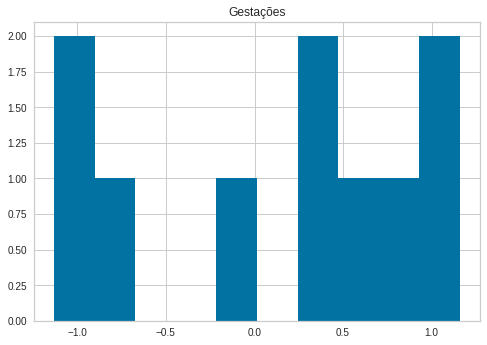

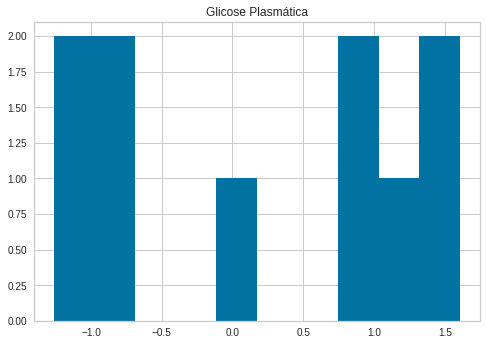

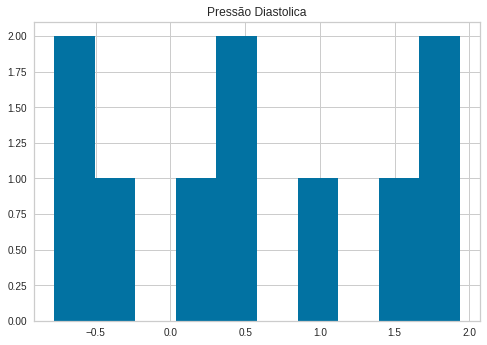

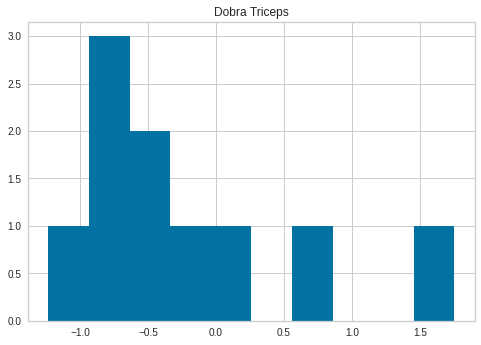

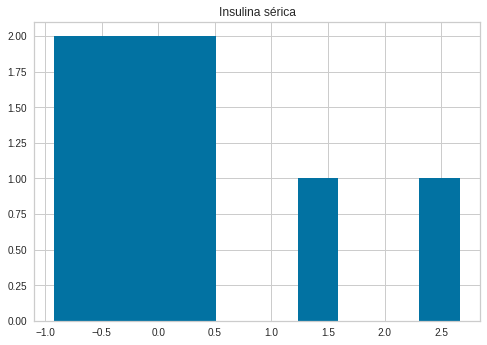

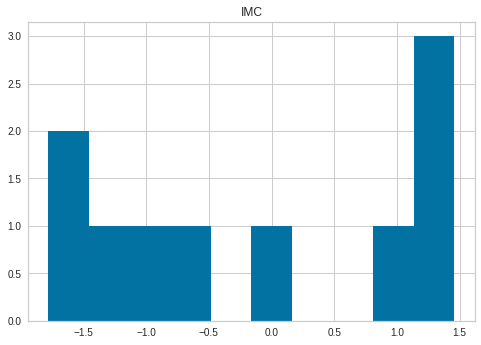

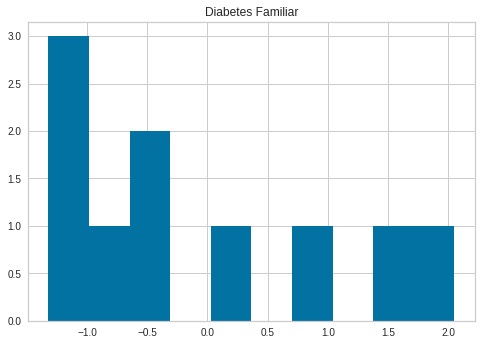

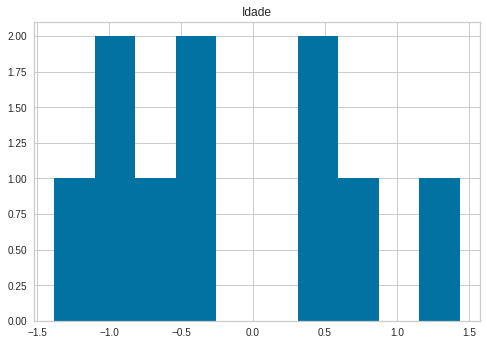

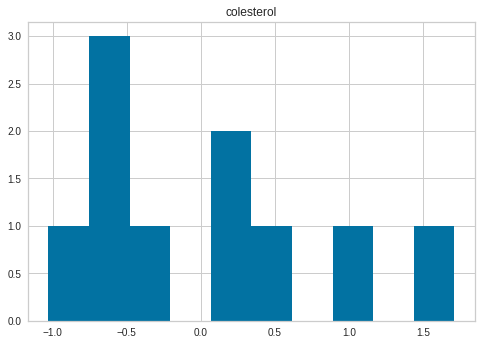

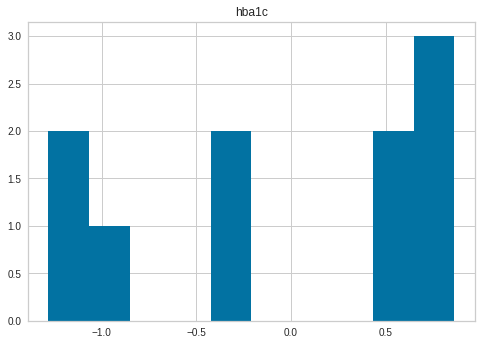

In [6]:
colunas = x_treinamento.shape[1]
features = ['Gestações', 'Glicose Plasmática', 'Pressão Diastolica',
           'Dobra Triceps', 'Insulina sérica', 'IMC', 'Diabetes Familiar','Idade','colesterol','hba1c']
for col in range(0,colunas):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.hist(x_treinamento[col])
    plt.title(features[col])
    plt.show()

##  Gaussiano Naive Bayes

In [4]:
model_Gaussian = GaussianNB()
model_Gaussian.fit(x_treinamento,y_treinamento)

GaussianNB()

In [5]:
previsao = model_Gaussian.predict(x_teste)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2447
           1       0.62      0.58      0.60       946

    accuracy                           0.78      3393
   macro avg       0.73      0.72      0.72      3393
weighted avg       0.78      0.78      0.78      3393



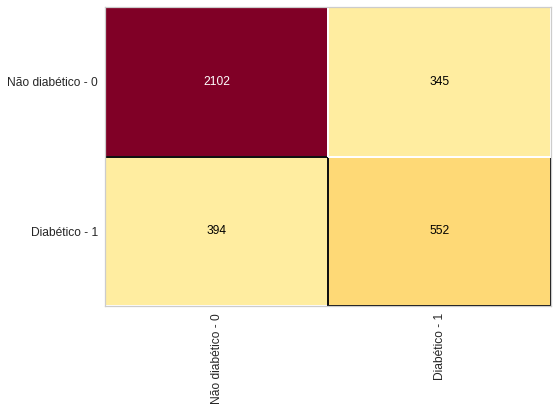

In [6]:
cm = ConfusionMatrix(model_Gaussian,classes=['Não diabético - 0', 'Diabético - 1'])
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)
print(classification_report(y_teste,previsao))

## Bernoulli Naive Bayes 

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      2447
           1       0.59      0.51      0.55       946

    accuracy                           0.77      3393
   macro avg       0.71      0.69      0.70      3393
weighted avg       0.76      0.77      0.76      3393



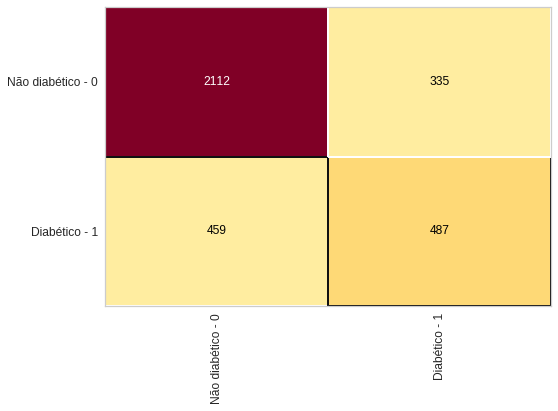

In [8]:
model_Bernoulli = BernoulliNB()
model_Bernoulli.fit(x_treinamento,y_treinamento)

previsao = model_Bernoulli.predict(x_teste)

cm = ConfusionMatrix(model_Bernoulli,classes=['Não diabético - 0', 'Diabético - 1'])
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)
print(classification_report(y_teste,previsao))

In [7]:
with open('modelo/naiveGaussian_model.pkl', 'wb') as file:
    pickle.dump(model_Gaussian, file)

In [9]:
with open('modelo/naiveBernoulli_model.pkl', 'wb') as file:
    pickle.dump(model_Bernoulli, file)